# Dataton Aiffel
* Group : EagleAI
* Dataset : 영화관 입장권 통합 전산망
* Name : 김용훈(Kim yonghun)

## Contents

1. Import libraries & load dataset
2. Data PDA
3. Data preprocessing
4. Visualization of first idea

## 1. Import libraries & load dataset

* if want to show korean on matplotlib, command annotation lines on termianl 
* set kor font in matplotlib using 'rc' function (나눔 고딕)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

* load dataset
* show dataset shape and head

In [2]:
data = pd.read_csv('KOBIS.csv')
print(data.shape)
data.head()

(26197, 18)


,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화


## 2. Data PDA

* Check how many rows have null values.
* Visualization counts of null values in rows

Counts of rows having null values : 25179
Counts of rows having null values over 4 : 238


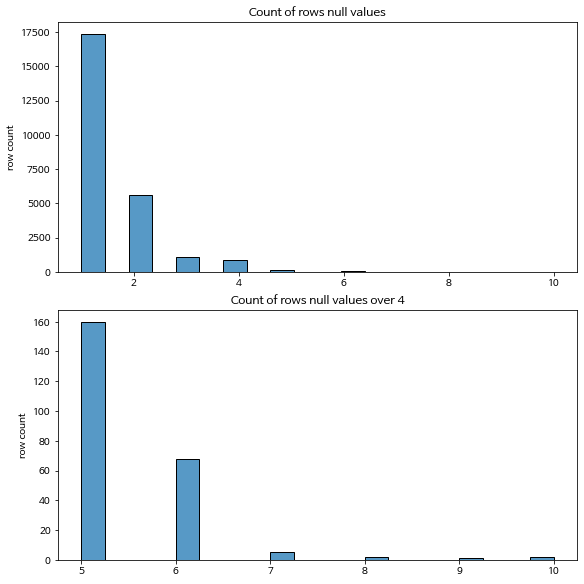

In [3]:
data_null = data.isnull().sum(axis = 1)
data_null = data_null[data_null.values > 0 ]
print("Counts of rows having null values :", len(data_null))
data_null2 = data_null[data_null.values > 4]
print("Counts of rows having null values over 4 :", len(data_null2))

fig, ax = plt.subplots(2,1,constrained_layout=True, figsize = (8,8))
ax[0].set_title("Count of rows null values")
sns.histplot(x=data_null.values, ax = ax[0], bins=20)
ax[0].set_ylabel('row count')
ax[1].set_title("Count of rows null values over 4")
sns.histplot(x=data_null2.values, ax = ax[1], bins=20)
ax[1].set_ylabel('row count')

plt.show()

* Delete rows having over 5 null values(78 count)

In [4]:
data_null = data_null[data_null.values > 5]
print('Count :', len(data_null))
data = data.drop(data_null.index)

Count : 78


* Check which columns have null values.

In [5]:
data_null = data.isnull().any()
data_null = data_null[data_null.values == True]
data_null_col = data_null.index
data_null_col

Index(['Director', 'Production_Company', 'Import_Company',
       'Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality',
       'National_Sales', 'Seoul_Sales', 'Genre', 'Rating'],
      dtype='object')

* Visualization how many columns have null values

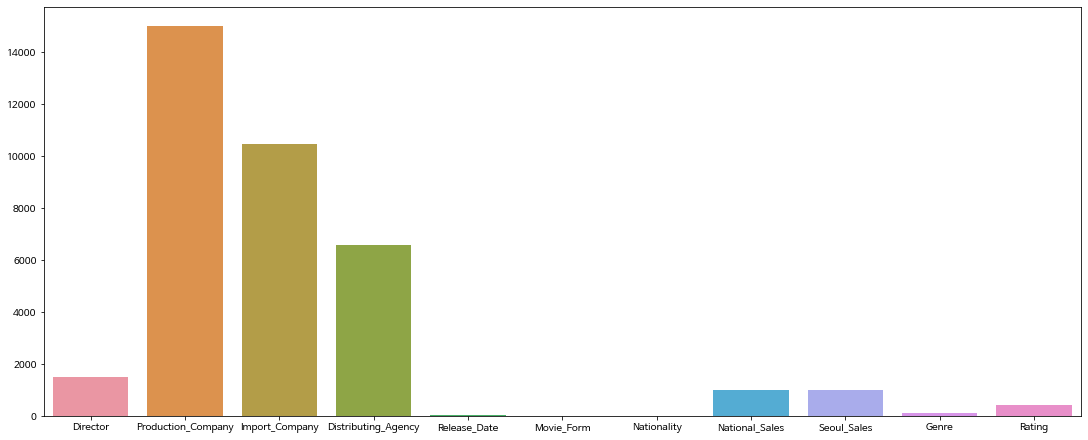

In [6]:
data_null = data.isnull().sum(axis = 0)
data_null = data_null[data_null_col]
# data_null.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(constrained_layout=True, figsize = (15,6))
sns.barplot(x=data_null.index, y=data_null.values)

plt.show()

## 3. Data preprocessing

1. Divides by what column datatype
   - numeric no null :  
      1. 'ID'  
      2. 'National_number_screens'    
      3. 'National_Audience'  
      4. 'Seoul_Audience'  
   - numeric have null :  
      1. 'National_Sales'  
      2. 'Seoul_Sales'  
   - datetime :  
      * Release_date  
   - string have null :  
      1. 'Director'  
      2. 'Production_Company'  
      3. 'Import_Company'  
      4. 'Distributing_Agency'  
      5. 'Moive_Form'  
      6. 'Nationality'  
      7. 'Genre'  
      8. 'Rating'
    - string no null :  
      1. 'Movie_Name'
      2. 'Movie_Type'
      3. 'Movie_Classification'
2. Data preprocessing numeric columns
3. Data preprocessing string columns

Fill null value with '0' in numeric_columns have string values

In [7]:
num_columns = ['National_number_screens','National_Sales','National_Audience','Seoul_Sales','Seoul_Audience']
data[num_columns] = data[num_columns].fillna('0')
data[num_columns].isna().sum()

National_number_screens    0
National_Sales             0
National_Audience          0
Seoul_Sales                0
Seoul_Audience             0
dtype: int64

Change num_columns value type to integer

In [8]:
for i in num_columns:
    data[i] = data[i].str.replace(",","").astype('int')

Fill null values with 'No_column_name' in  
['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Release_Date', 'Genre']

In [9]:
# String null columns
# string_columns = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality', 'Genre', 'Rating']
string_columns1 = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Movie_Form', 'Genre']
data[string_columns1].isnull().sum()

Director                1499
Production_Company     15002
Import_Company         10477
Distributing_Agency     6573
Movie_Form                 8
Genre                    121
dtype: int64

In [10]:
for i in string_columns1:
    data[i] = data[i].fillna('No_'+ i)
# data.head()
# data[string_columns1].isnull().sum()

Search and fill Nationality column null values

In [11]:
data[data['Nationality'].isnull()]

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
251,252,오! 브라더스,No_Director,No_Production_Company,No_Import_Company,No_Distributing_Agency,2003-09-05,개봉영화,장편,NaN,0,0,3148748,0,952010,코미디,15세관람가,일반영화
3805,3806,필사의 탈출,러스 메이버리,No_Production_Company,연방영화(주),No_Distributing_Agency,1976-03-20,개봉영화,장편,NaN,0,0,0,0,63727,드라마,NaN,일반영화
6802,6803,신촉산,서극,No_Production_Company,(주)건화상사,No_Distributing_Agency,1983-04-23,개봉영화,단편,NaN,0,0,0,0,16422,액션,NaN,일반영화
23940,23941,우리는그들을잊으려한다,다코 베직,No_Production_Company,No_Import_Company,No_Distributing_Agency,1992-03-27,개봉영화,No_Movie_Form,NaN,0,0,0,0,0,드라마,고등학생이상관람가,일반영화


* 오! 브라더스 : 한국  
* 필사의 탈출 : 미국  
* 신촉산 : 홍콩  
* 우리는그들을잊으려한다 : 유고슬라비아  
We have to see that values in columns

In [12]:
Nationality_columns = ['한국','미국','홍콩','유고슬라비아']
for i in Nationality_columns:
    print(i in set(data['Nationality']))

True
True
True
True


All values also in column  
so, add values in each rows

In [13]:
data.loc[251 , 'Nationality' ] = '한국'
data.loc[3805 , 'Nationality' ] = '미국'
data.loc[6802 , 'Nationality' ] = '홍콩'
data.loc[23940 , 'Nationality' ] = '유고슬라비아'
data.loc[[251, 3805, 6802, 23940]]

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
251,252,오! 브라더스,No_Director,No_Production_Company,No_Import_Company,No_Distributing_Agency,2003-09-05,개봉영화,장편,한국,0,0,3148748,0,952010,코미디,15세관람가,일반영화
3805,3806,필사의 탈출,러스 메이버리,No_Production_Company,연방영화(주),No_Distributing_Agency,1976-03-20,개봉영화,장편,미국,0,0,0,0,63727,드라마,NaN,일반영화
6802,6803,신촉산,서극,No_Production_Company,(주)건화상사,No_Distributing_Agency,1983-04-23,개봉영화,단편,홍콩,0,0,0,0,16422,액션,NaN,일반영화
23940,23941,우리는그들을잊으려한다,다코 베직,No_Production_Company,No_Import_Company,No_Distributing_Agency,1992-03-27,개봉영화,No_Movie_Form,유고슬라비아,0,0,0,0,0,드라마,고등학생이상관람가,일반영화


Rating and Release Date have null values

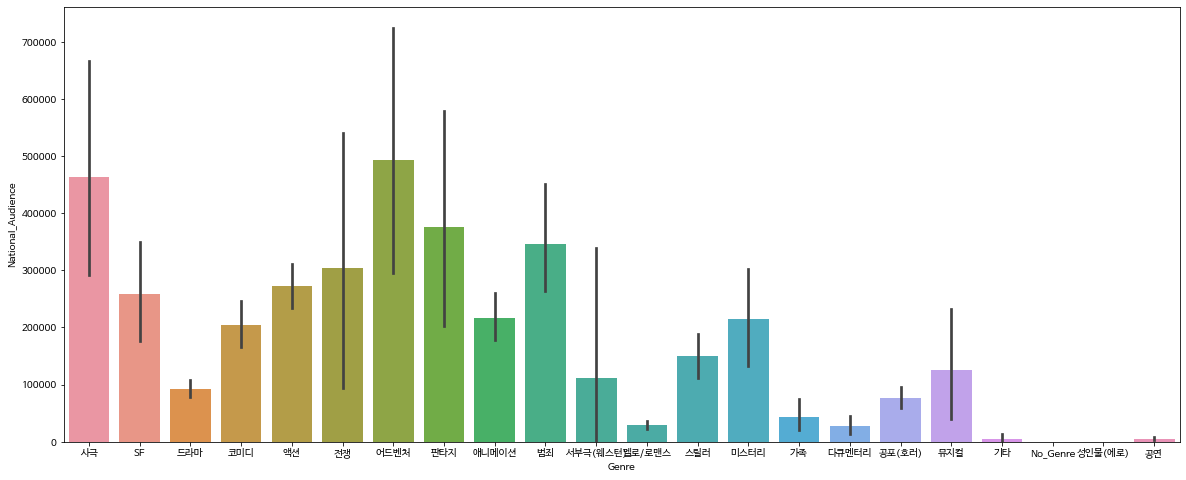

In [14]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(20, 8))
fig = sns.barplot(x=data['Genre'], y=data['National_Audience'])
plt.show()

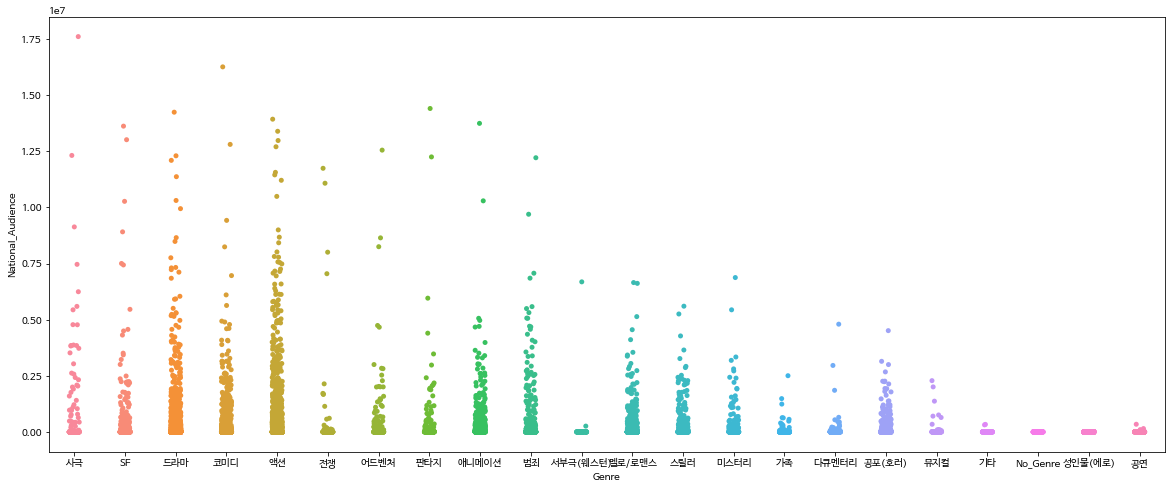

In [15]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(20, 8))
fig = sns.stripplot(x=data['Genre'], y=data['National_Audience'])
plt.show()